# Het verkrijgen van de data

Complete tekst van de Elegieën van deze site getrokken:
https://de.wikisource.org/wiki/Duineser_Elegien. Daarna met behulp van perl een beetje aangepast.

```
perl -pi -e 's,\d+,,g' el1.txt 
perl -pi -e 's,\[\],,g' el1.txt
perl -pi -e 's,^\n\r?$,,g' el1.txt
```

## Inventarisatie van de data

In [1]:
import numpy as np
import pandas as pd

In [2]:
data = {}
for i in range(10):
    file = f'el{i+1}'
    with open (f'data/{file}.txt','r') as d:
        lines = d.read().split('\n')
        aantal_regels = len(lines)
        wpr = [len(x.split(' ')) for x in lines]
        data[file] = pd.Series(wpr, dtype=pd.Int64Dtype)

In [3]:
df = pd.DataFrame(data)
df.head()

,el1,el2,el3,el4,el5,el6,el7,el8,el9,el10
0,10,8,9,6,11,8,7,6,9,9
1,6,8,6,9,10,7,11,6,8,6
2,9,8,10,5,6,7,9,7,7,7
3,7,9,11,7,7,5,12,7,8,6
4,9,10,11,6,7,8,12,8,6,7


In [4]:
flat = df.melt()
flat['value'] = pd.to_numeric(flat['value'])
flat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1150 entries, 0 to 1149
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   variable  1150 non-null   object 
 1   value     870 non-null    float64
dtypes: float64(1), object(1)
memory usage: 18.1+ KB


In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
#plt.xkcd()

<AxesSubplot:title={'center':'value'}, xlabel='variable'>

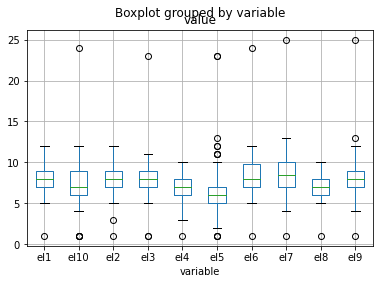

In [6]:
flat.boxplot(column=['value'], by='variable')

<AxesSubplot:xlabel='variable', ylabel='value'>

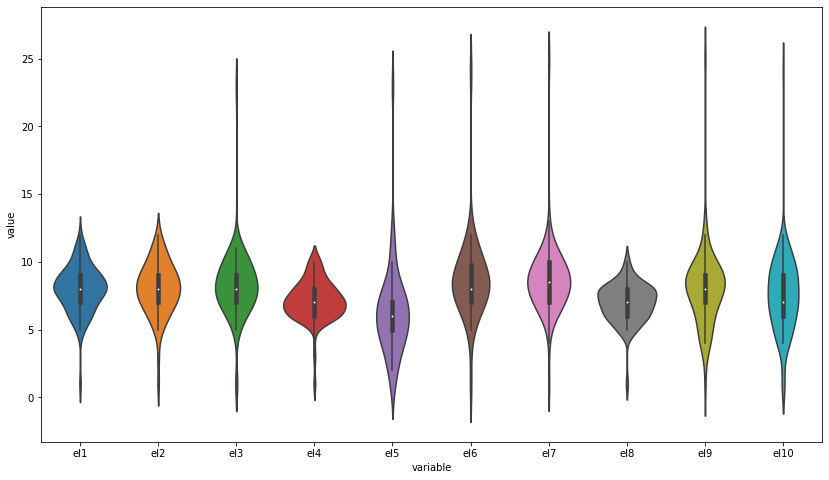

In [7]:
#fig, ax = plt.subplots(figsize = ( 5 , 3 )) 
plt.figure(figsize=(14,8))
#plt.xkcd()
sns.violinplot(x=flat.variable, y=flat.value, col="A", row="B")
#g = g.set_axis_labels("Elegie","Aantal regels")
#plt.title("Aantal regels per elegie")

## Gemiddelde regel-lengte binnen alle tien elegieën

<AxesSubplot:ylabel='value'>

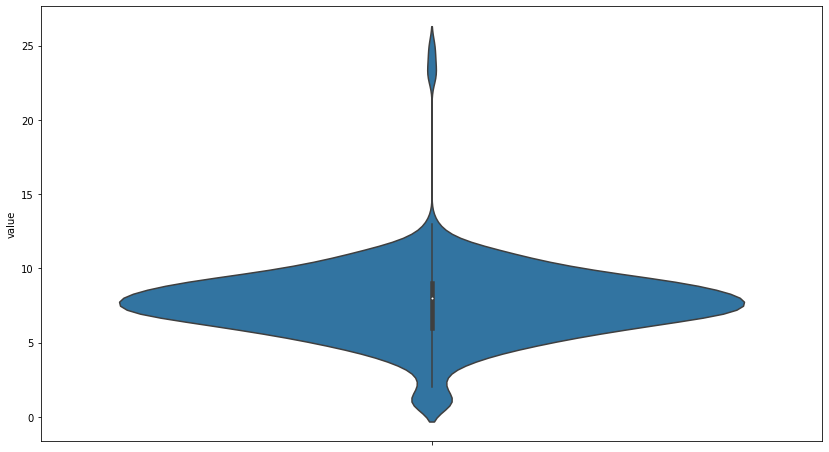

In [9]:
plt.figure(figsize=(14,8))
sns.violinplot(y=flat.value)

<AxesSubplot:>

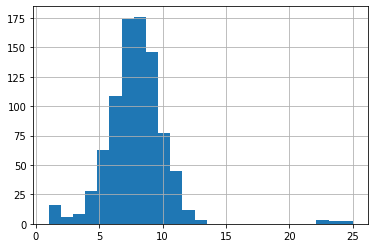

In [8]:
flat.value.hist(bins=25)

In [80]:
freqs = flat.groupby(['value']).count()
freqs.reset_index(inplace=True)
freqs.columns = ['length','freq']
freqs['length'] = freqs['length'].astype(int)
freqs['norm_freq'] = freqs['freq']/freqs['freq'].sum()
freqs

,length,freq,norm_freq
0,1,16,0.018391
1,2,6,0.006897
2,3,8,0.009195
3,4,28,0.032184
4,5,63,0.072414
5,6,109,0.125287
6,7,174,0.200000
7,8,176,0.202299
8,9,146,0.167816
9,10,77,0.088506


Een nummer verkrijgen op basis van een bepaalde distributie: dat kan [met de optionele parameter `p` in `np.random.choice`](https://numpy.org/doc/stable/reference/random/generated/numpy.random.choice.html)

In [81]:
np.random.choice(freqs['length'],p=freqs['norm_freq'])

8

Levert de volgende functie op:

In [11]:
def get_line_length():
    lens = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 23, 24, 25]
    dist = [0.01839080459770115, 0.006896551724137931, 0.009195402298850575, 0.03218390804597701, 0.07241379310344828, 0.12528735632183907, 0.2, 0.20229885057471264, 0.167816091954023, 0.08850574712643679, 0.05172413793103448, 0.013793103448275862, 0.0034482758620689655, 0.0034482758620689655, 0.0022988505747126436, 0.0022988505747126436]
    return np.random.choice(lens, p=dist)

Hetzelfde principe kunnen we gebruiken om de lengte van een stanza te bepalen. Die lengte van de strofen per elegie heb ik gewoon even geteld.


In [ ]:
def get_strophe_length():
    lens = [8, 7, 10, 4, 3, 5, 6, 9, 11, 13, 12, 2, 15, 18, 19, 28, 31, 14, 17, 21, 22, 24, 25, 32] 
    dist = [0.19047619047619047, 0.09523809523809523, 0.09523809523809523, 0.07142857142857142, 0.047619047619047616, 0.047619047619047616, 0.047619047619047616, 0.047619047619047616, 0.047619047619047616, 0.03571428571428571, 0.03571428571428571, 0.03571428571428571, 0.03571428571428571, 0.023809523809523808, 0.023809523809523808, 0.023809523809523808, 0.011904761904761904, 0.011904761904761904, 0.011904761904761904, 0.011904761904761904, 0.011904761904761904, 0.011904761904761904, 0.011904761904761904, 0.011904761904761904]
    return np.random.choice(lens, p=dist)